# Introduction

case description

| Field Name	| Definition |
| --- | --- |
| RefID	| Unique (sequential) number assigned to vehicles |
| IsBadBuy |	Identifies if the kicked vehicle was an avoidable purchase | 
| PurchDate | The Date the vehicle was Purchased at Auction |
| Auction	| Auction provider at which the  vehicle was purchased |
| VehYear	| The manufacturer's year of the vehicle |
| VehicleAge | The Years elapsed since the manufacturer's year |
| Make | Vehicle Manufacturer | 
| Model | Vehicle Model |
| Trim | Vehicle Trim Level |
| SubModel | Vehicle Submodel |
| Color | Vehicle Color |
| Transmission | Vehicles transmission type (Automatic, Manual) |
| WheelTypeID	| The type id of the vehicle wheel |
| WheelType | The vehicle wheel type description (Alloy, Covers) |
| VehOdo | The vehicles odometer reading |
| Nationality	| The Manufacturer's country |
| Size | The size category of the vehicle (Compact, SUV, etc.) |
| TopThreeAmericanName | Identifies if the manufacturer is one of the top three American manufacturers |
| MMRAcquisitionAuctionAveragePrice | Acquisition price for this vehicle in average condition at time of purchase |	
| MMRAcquisitionAuctionCleanPrice	| Acquisition price for this vehicle in the above Average condition at time of purchase |
| MMRAcquisitionRetailAveragePrice | Acquisition price for this vehicle in the retail market in average condition at time of purchase |
| MMRAcquisitonRetailCleanPrice | Acquisition price for this vehicle in the retail market in above average condition at time of purchase |
| MMRCurrentAuctionAveragePrice |	Acquisition price for this vehicle in average condition as of current day |	
| MMRCurrentAuctionCleanPrice | Acquisition price for this vehicle in the above condition as of current day |
| MMRCurrentRetailAveragePrice | Acquisition price for this vehicle in the retail market in average condition as of current day |
| MMRCurrentRetailCleanPrice | Acquisition price for this vehicle in the retail market in above average condition as of current day |
| PRIMEUNIT | Identifies if the vehicle would have a higher demand than a standard purchase |
| AcquisitionType | Identifies how the vehicle was aquired (Auction buy, trade in, etc) |
| AUCGUART | The level guarntee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is) |
| KickDate | Date the vehicle was kicked back to the auction |
| BYRNO | Unique number assigned to the buyer that purchased the vehicle |
| VNZIP | Zipcode where the car was purchased |
| VNST | State where the the car was purchased |
| VehBCost | Acquisition cost paid for the vehicle at time of purchase |
| IsOnlineSale | Identifies if the vehicle was originally purchased online |
| WarrantyCost | Warranty price (term=36month  and millage=36K) |

# 1) Data Preparation


## 1.1 Research

## 1.2 Understand data: data dictionary



## 1.3 Define Metric
* f1 score, additionally accurancy and precision

## 2) EDA

In [1]:
#import relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read train data
df = pd.read_csv("training.csv")
display(df.head())

df_copy = df.copy()  # for testing

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [3]:
df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [4]:
#check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [5]:
#drop RefId
df = df.drop("RefId", axis=1)

In [6]:
#convert "PurchDate" to time series
df.loc[:, "PurchDate"] = pd.to_datetime(df.loc[:, "PurchDate"])

In [7]:
# converting "PurchDate" time series to "PurchYear"
df.loc[:, "PurchYear"] = df.loc[:, "PurchDate"].dt.year
df = df.drop("PurchDate", axis=1)

In [8]:
#convert object dtypes to categorial to save memory
for col in df.select_dtypes('object'):
    df.loc[:, col] = df.loc[:, col].astype('category')

In [9]:
#convert 'IsOnlineSale' to category as columns are categorial
df.loc[:, 'IsOnlineSale'] = df.loc[:, 'IsOnlineSale'].astype('category')

In [10]:
#check dtypes again
df.dtypes

IsBadBuy                                int64
Auction                              category
VehYear                                 int64
VehicleAge                              int64
Make                                 category
Model                                category
Trim                                 category
SubModel                             category
Color                                category
Transmission                         category
WheelTypeID                           float64
WheelType                            category
VehOdo                                  int64
Nationality                          category
Size                                 category
TopThreeAmericanName                 category
MMRAcquisitionAuctionAveragePrice     float64
MMRAcquisitionAuctionCleanPrice       float64
MMRAcquisitionRetailAveragePrice      float64
MMRAcquisitonRetailCleanPrice         float64
MMRCurrentAuctionAveragePrice         float64
MMRCurrentAuctionCleanPrice       

In [11]:
#checking unique values for each categorial column
for col in df.select_dtypes('category').columns:
    print('{} : {}'.format(col, df.loc[:, col].nunique()))

Auction : 3
Make : 33
Model : 1063
Trim : 134
SubModel : 863
Color : 16
Transmission : 3
WheelType : 3
Nationality : 4
Size : 12
TopThreeAmericanName : 4
PRIMEUNIT : 2
AUCGUART : 2
VNST : 37
IsOnlineSale : 2


In [12]:
#check statistical summary
df.describe()

,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,WarrantyCost,PurchYear
count,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,1276.580985,2009.519600
std,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,598.846788,0.499619
min,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,462.000000,2009.000000
25%,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,837.000000,2009.000000
50%,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,1155.000000,2010.000000
75%,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,1623.000000,2010.000000
max,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,7498.000000,2010.000000


In [13]:
#all values seem to be reasonable

In [14]:
#downcast to save memory


## Outlier detection

In [15]:
# check for outliers (visually)
# sns.pairplot(df);

In [16]:
# for column in df.select_dtypes('number'):
#     plt.figure()
#     sns.boxplot(data=df.select_dtypes('number'), x="IsBadBuy", y=column)

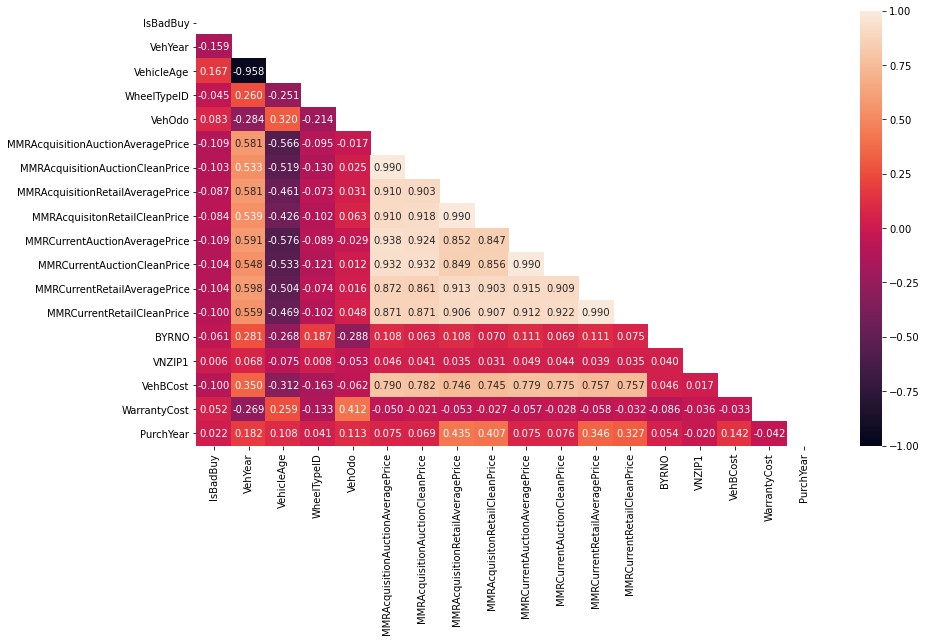

In [17]:
#check correlation matrix
fig, ax = plt.subplots(figsize=(14, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, fmt='.3f', annot=True, ax=ax);

In [18]:
#convert 'IsOnlineSale' to category as column is categorial
df.loc[:, 'IsBadBuy'] = df.loc[:, 'IsBadBuy'].astype('category')

In [19]:
# VehYear and VehAge are equivalent to each other, thus Year will be dropped
df = df.drop("VehYear", axis=1)

# drop WheelTypeID as it is equivalent to WheelType (ID may confuse model with ordinal numbers)
df = df.drop("WheelTypeID", axis=1)

# drop VNZIP1 as it has no correlation to target
df = df.drop("VNZIP1", axis=1)

# drop SubModel as it's specific than Model and does not add much value
df = df.drop("SubModel", axis=1)

#MMR columns are highly correlated with each other, will be considered when modeling

In [20]:
def cleaning(df):
    
    #drop RefId
    df = df.drop("RefId", axis=1)
    
    #set PurchDate as datetime
    df.loc[:, "PurchDate"] = pd.to_datetime(df.loc[:, "PurchDate"])

    # converting "PurchDate" time series to "PurchYear"
    df.loc[:, "PurchYear"] = df.loc[:, "PurchDate"].dt.year
    df = df.drop("PurchDate", axis=1)

    # convert object dtypes to categorial to save memory
    for col in df.select_dtypes('object'):
        df.loc[:, col] = df.loc[:, col].astype('category')

    # convert 'RefID' and 'IsOnlineSale' to category as columns are categorial
    df.loc[:, 'IsOnlineSale'] = df.loc[:, 'IsOnlineSale'].astype('category')

    # convert 'IsOnlineSale' to category as column is categorial
    df.loc[:, 'IsBadBuy'] = df.loc[:, 'IsBadBuy'].astype('category')

    # VehYear and VehAge are equivalent to each other, thus Year will be dropped
    df = df.drop("VehYear", axis=1)

    # drop WheelTypeID as it is equivalent to WheelType (ID may confuse model with ordinal numbers)
    df = df.drop("WheelTypeID", axis=1)

    # drop VNZIP1 as it has no correlation to target
    df = df.drop("VNZIP1", axis=1)

    # drop SubModel as it's specific than Model and does not add much value
    df = df.drop("SubModel", axis=1)

    return df

In [21]:
#test function on basic level
df_copy_cleaned = cleaning(df_copy)
df_copy_cleaned.equals(df)

True

# Train-Test-Split

In [22]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, random_state=42, test_size = 0.2)

df_train_copy = df_train.copy() # for testing

## Data Preparation

In [23]:
#duplicated rows?
df_train.duplicated().sum()

0

In [24]:
#missing values sorted in descending order
df_train.isna().sum().sort_values(ascending=False)

PRIMEUNIT                            55633
AUCGUART                             55633
WheelType                             2530
Trim                                  1903
MMRCurrentRetailCleanPrice             257
MMRCurrentRetailAveragePrice           257
MMRCurrentAuctionCleanPrice            257
MMRCurrentAuctionAveragePrice          257
MMRAcquisitonRetailCleanPrice           13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
Transmission                             7
Color                                    6
TopThreeAmericanName                     4
Nationality                              4
Size                                     4
BYRNO                                    0
VNST                                     0
VehBCost                                 0
IsOnlineSale                             0
WarrantyCost                             0
IsBadBuy                                 0
Auction    

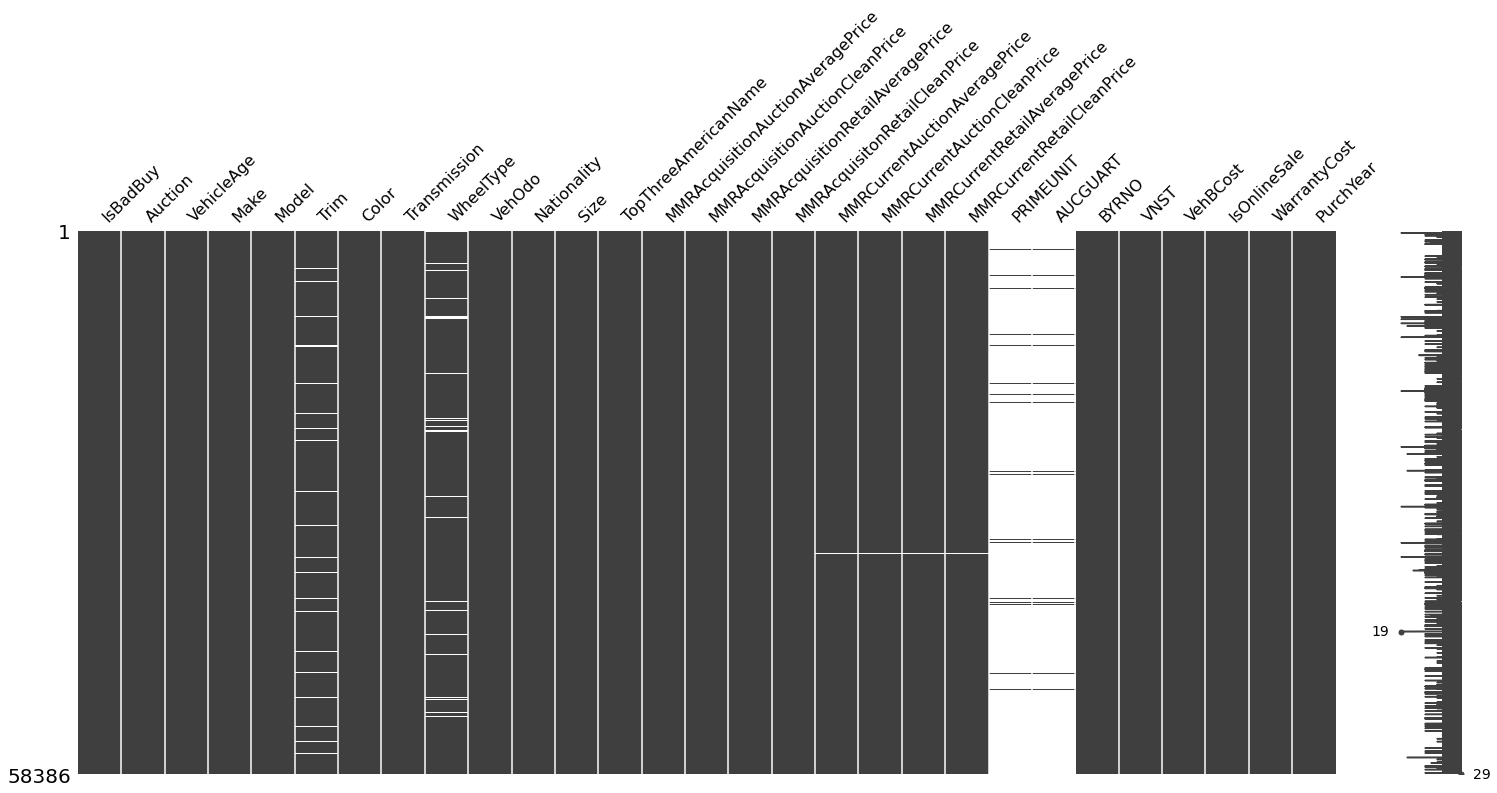

In [25]:
#!pip install missingno
import missingno as msno 
%matplotlib inline
msno.matrix(df_train);

In [26]:
#drop PRIMEUNIT and AUCGUART as too many values are missing that cannot be replaced
df_train = df_train.drop(["PRIMEUNIT", "AUCGUART"], axis=1)

In [27]:
mask_mmr = df_train.loc[:, ['MMRAcquisitionAuctionAveragePrice',
                            'MMRAcquisitionAuctionCleanPrice',
                            'MMRAcquisitionRetailAveragePrice',
                            'MMRAcquisitonRetailCleanPrice',
                            'MMRCurrentAuctionAveragePrice',
                            'MMRCurrentAuctionCleanPrice',
                            'MMRCurrentRetailAveragePrice',
                            'MMRCurrentRetailCleanPrice']].isna().all(axis=1)
df_train[mask_mmr]

,IsBadBuy,Auction,VehicleAge,Make,Model,Trim,Color,Transmission,WheelType,VehOdo,...,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNST,VehBCost,IsOnlineSale,WarrantyCost,PurchYear
736,0,ADESA,3,DODGE,DURANGO 4WD V8,Adv,BLUE,AUTO,Alloy,72222,...,NaN,NaN,NaN,NaN,52117,VA,11340.0,0,1623,2010
11815,0,MANHEIM,6,NISSAN,TITAN PICKUP 2WD V8,LE,GREEN,AUTO,Alloy,80971,...,NaN,NaN,NaN,NaN,25100,TX,9100.0,0,1373,2010
6550,0,MANHEIM,6,NISSAN,TITAN PICKUP 2WD V8,LE,BLACK,AUTO,Alloy,82579,...,NaN,NaN,NaN,NaN,835,AZ,10240.0,0,1373,2010
68544,0,ADESA,3,DODGE,DURANGO 4WD V8,Adv,WHITE,AUTO,Alloy,75238,...,NaN,NaN,NaN,NaN,22916,CO,11845.0,0,1623,2010
69722,0,ADESA,2,GMC,1500 SIERRA PICKUP 2,SL,BLACK,AUTO,Covers,85899,...,NaN,NaN,NaN,NaN,835,AZ,7370.0,0,1373,2009
36513,0,MANHEIM,2,JEEP,COMMANDER,Spo,SILVER,AUTO,Alloy,63717,...,NaN,NaN,NaN,NaN,22808,TX,10750.0,0,1801,2009
13254,0,MANHEIM,3,DODGE,DURANGO 4WD V8,Adv,BLUE,AUTO,Alloy,87956,...,NaN,NaN,NaN,NaN,52117,NC,9900.0,0,1763,2010
30278,0,MANHEIM,2,CHRYSLER,SEBRING 4C,LX,GREY,AUTO,Covers,47412,...,NaN,NaN,NaN,NaN,20928,FL,7950.0,0,834,2010
64931,0,MANHEIM,6,FORD,F150 PICKUP 2WD V8 5,XL,WHITE,AUTO,Alloy,70334,...,NaN,NaN,NaN,NaN,18822,TX,8655.0,0,1103,2009
52065,0,MANHEIM,6,NISSAN,TITAN PICKUP 2WD V8,LE,GREY,AUTO,Alloy,53383,...,NaN,NaN,NaN,NaN,20207,TX,9335.0,0,1003,2010


In [28]:
df_train = df_train.drop(df_train[mask_mmr].index)

In [29]:
# replacing missing values of numerical columns (only MMR) with 
for col in df_train.select_dtypes('number'):
    df_train[col] = df_train[col].fillna(df_train[col].median())

In [30]:
#checking categorial columns for missing values
df_train.isna().sum().sort_values(ascending=False)

WheelType                            2530
Trim                                 1903
Transmission                            7
Color                                   6
Nationality                             4
TopThreeAmericanName                    4
Size                                    4
MMRCurrentRetailAveragePrice            0
MMRCurrentRetailCleanPrice              0
BYRNO                                   0
IsBadBuy                                0
VNST                                    0
MMRCurrentAuctionAveragePrice           0
VehBCost                                0
IsOnlineSale                            0
WarrantyCost                            0
MMRCurrentAuctionCleanPrice             0
MMRAcquisitionAuctionAveragePrice       0
MMRAcquisitonRetailCleanPrice           0
MMRAcquisitionRetailAveragePrice        0
MMRAcquisitionAuctionCleanPrice         0
Auction                                 0
VehOdo                                  0
Model                             

In [31]:
##checking categorial columns for duplicated unique values

for col in df.select_dtypes('category').columns:
    print('{} : {}'.format(col, df.loc[:, col].unique()))

IsBadBuy : [0, 1]
Categories (2, int64): [0, 1]
Auction : ['ADESA', 'OTHER', 'MANHEIM']
Categories (3, object): ['ADESA', 'OTHER', 'MANHEIM']
Make : ['MAZDA', 'DODGE', 'FORD', 'MITSUBISHI', 'KIA', ..., 'PLYMOUTH', 'LEXUS', 'ACURA', 'TOYOTA SCION', 'HUMMER']
Length: 33
Categories (33, object): ['MAZDA', 'DODGE', 'FORD', 'MITSUBISHI', ..., 'LEXUS', 'ACURA', 'TOYOTA SCION', 'HUMMER']
Model : ['MAZDA3', '1500 RAM PICKUP 2WD', 'STRATUS V6', 'NEON', 'FOCUS', ..., 'CX-7 FWD 4C', 'ALTIMA 3.5L V6 MPI /', 'EXCURSION 4WD V8 5.4', 'M45 4.5L V8 MPI / SF', 'PATRIOT 2WD 4C 2.0L']
Length: 1063
Categories (1063, object): ['MAZDA3', '1500 RAM PICKUP 2WD', 'STRATUS V6', 'NEON', ..., 'ALTIMA 3.5L V6 MPI /', 'EXCURSION 4WD V8 5.4', 'M45 4.5L V8 MPI / SF', 'PATRIOT 2WD 4C 2.0L']
Trim : ['i', 'ST', 'SXT', 'ZX3', 'ES', ..., 'LL', 'Hyb', 'JLX', 'JLS', 'L 3']
Length: 135
Categories (134, object): ['i', 'ST', 'SXT', 'ZX3', ..., 'Hyb', 'JLX', 'JLS', 'L 3']
Color : ['RED', 'WHITE', 'MAROON', 'SILVER', 'BLACK', ...

In [32]:
# Transmission has 'MANUAL' and 'Manual', will be unified
df_train.loc[:, 'Transmission'] = df_train.loc[:, 'Transmission'].replace(to_replace='Manual', value='MANUAL')

In [33]:
# check for missing values on same rows of 'Trim' and 'WheelType' columns
mask_trimwheel = df_train.loc[:, ['Trim', 'WheelType']].isna().all(axis=1)
df_train[mask_trimwheel]

,IsBadBuy,Auction,VehicleAge,Make,Model,Trim,Color,Transmission,WheelType,VehOdo,...,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNST,VehBCost,IsOnlineSale,WarrantyCost,PurchYear
69486,1,ADESA,4,SATURN,RELAY 2WD V6 3.5L V6,NaN,BLUE,AUTO,NaN,70012,...,6533.0,7947.0,7556.0,9083.0,19064,AZ,6435.0,0,2091,2009
40941,0,MANHEIM,6,SATURN,VUE 2WD 4C 2.2L I4 M,NaN,OTHER,AUTO,NaN,61904,...,3788.0,5011.0,6624.0,7544.0,18880,SC,6155.0,0,1711,2009
66364,1,ADESA,3,SUZUKI,FORENZA,NaN,SILVER,AUTO,NaN,74382,...,3905.0,4892.0,4717.0,5783.0,17675,NC,3600.0,0,569,2009
16927,0,MANHEIM,6,CHRYSLER,PACIFICA FWD,NaN,WHITE,AUTO,NaN,85204,...,6533.0,7871.0,9684.0,11117.0,19619,FL,7700.0,0,1503,2010
24452,0,OTHER,3,SUZUKI,FORENZA 2.0L I4 EFI,NaN,GOLD,AUTO,NaN,81406,...,3837.0,4783.0,7040.0,8051.0,18880,SC,3300.0,0,594,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9076,0,MANHEIM,6,PONTIAC,MONTANA 3.4L V6 EFI,NaN,SILVER,AUTO,NaN,67507,...,3616.0,4761.0,4405.0,5642.0,18880,NC,4535.0,0,4210,2009
41605,1,MANHEIM,7,SATURN,VUE 2WD 4C,NaN,BLACK,AUTO,NaN,75802,...,3217.0,4083.0,6153.0,7079.0,21973,FL,6835.0,0,1923,2010
71523,1,ADESA,6,PONTIAC,MONTANA 3.4L V6 EFI,NaN,WHITE,AUTO,NaN,86685,...,3077.0,4406.0,3823.0,5258.0,18880,NC,4820.0,0,5392,2009
9077,0,MANHEIM,2,SUZUKI,FORENZA 2.0L I4 EFI,NaN,SILVER,AUTO,NaN,12628,...,5617.0,6487.0,6566.0,7506.0,18880,NC,6435.0,0,462,2009


In [34]:
#removing same rows of 'Trim' and 'WheelType' affected by missing values 
df_train = df_train.drop(df_train[mask_trimwheel].index)

In [35]:
#replacing all remaining missing values in 'WheelType' and 'Trim' (both are categorial) with each's mode
for col in ['Trim', 'WheelType']:
    df_train.loc[:, col] = df_train.loc[:, col].fillna(df_train.loc[:, col].mode())

In [36]:
df_train.isna().sum().sort_values(ascending=False)

WheelType                            2427
Trim                                 1800
Transmission                            6
Color                                   5
Nationality                             4
TopThreeAmericanName                    4
Size                                    4
MMRCurrentRetailAveragePrice            0
MMRCurrentRetailCleanPrice              0
BYRNO                                   0
IsBadBuy                                0
VNST                                    0
MMRCurrentAuctionAveragePrice           0
VehBCost                                0
IsOnlineSale                            0
WarrantyCost                            0
MMRCurrentAuctionCleanPrice             0
MMRAcquisitionAuctionAveragePrice       0
MMRAcquisitonRetailCleanPrice           0
MMRAcquisitionRetailAveragePrice        0
MMRAcquisitionAuctionCleanPrice         0
Auction                                 0
VehOdo                                  0
Model                             

In [37]:
df_train = df_train.fillna(method='ffill')

In [38]:
df_train.isna().sum()

IsBadBuy                             0
Auction                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
Color                                0
Transmission                         0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNST                                 0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost             

In [39]:
#reset index
df_train = df_train.reset_index(drop=True)

In [40]:
# imputation function
def impute(df):

    # numerical columns
    df = df.drop(["PRIMEUNIT", "AUCGUART"], axis=1)

    mask_mmr = df.loc[:, ['MMRAcquisitionAuctionAveragePrice',
                          'MMRAcquisitionAuctionCleanPrice',
                          'MMRAcquisitionRetailAveragePrice',
                          'MMRAcquisitonRetailCleanPrice',
                          'MMRCurrentAuctionAveragePrice',
                          'MMRCurrentAuctionCleanPrice',
                          'MMRCurrentRetailAveragePrice',
                          'MMRCurrentRetailCleanPrice']].isna().all(axis=1)

    df = df.drop(df[mask_mmr].index)

    for col in df.select_dtypes('number'):
        df[col] = df[col].fillna(df[col].median())

    #categorial columns
    df.loc[:, 'Transmission'] = df.loc[:, 'Transmission'].replace(to_replace='Manual',
                                                                  value='MANUAL')

    mask_trimwheel = df.loc[:, ['Trim', 'WheelType']].isna().all(axis=1)
    df = df.drop(df[mask_trimwheel].index)


    df = df.fillna(method='ffill')
    
    #reset index
    df = df.reset_index(drop=True)

    return df

In [41]:
# test function on basic level
df_train_prep = impute(df_train_copy)
(df_train_prep.equals(df_train))

True

# Modeling

In [42]:
#instantiate feature matrix and target vector
features_train = df_train.drop("IsBadBuy", axis=1)
target_train = df_train.loc[:, "IsBadBuy"]

In [43]:
features_train.head()

,Auction,VehicleAge,Make,Model,Trim,Color,Transmission,WheelType,VehOdo,Nationality,...,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNST,VehBCost,IsOnlineSale,WarrantyCost,PurchYear
0,MANHEIM,2,FORD,FREESTYLE FWD V6 3.0,SEL,GREY,AUTO,Alloy,72485,AMERICAN,...,11778.0,13783.0,13220.0,15386.0,17675,NC,8000.0,0,1506,2009
1,MANHEIM,5,GMC,ENVOY 4WD 6C 4.2L I6,SLE,WHITE,AUTO,Alloy,80338,AMERICAN,...,8340.0,10119.0,9507.0,11429.0,20740,MD,7195.0,0,2152,2009
2,OTHER,2,DODGE,CALIBER,SE,WHITE,AUTO,Alloy,51904,AMERICAN,...,7901.0,8376.0,11284.0,11757.0,99761,OK,7300.0,0,754,2010
3,OTHER,5,CHEVROLET,IMPALA 3.4L V6 SFI,Bas,WHITE,AUTO,Covers,77375,AMERICAN,...,3643.0,4910.0,4434.0,5803.0,3453,CO,5655.0,0,1974,2009
4,OTHER,4,HYUNDAI,SONATA 4C,GLS,SILVER,AUTO,Alloy,62031,OTHER ASIAN,...,5989.0,7147.0,9257.0,10548.0,8172,AL,7900.0,0,728,2010


In [44]:
df.reset_index(drop=True)

,IsBadBuy,Auction,VehicleAge,Make,Model,Trim,Color,Transmission,WheelType,VehOdo,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNST,VehBCost,IsOnlineSale,WarrantyCost,PurchYear
0,0,ADESA,3,MAZDA,MAZDA3,i,RED,AUTO,Alloy,89046,...,11597.0,12409.0,NaN,NaN,21973,FL,7100.0,0,1113,2009
1,0,ADESA,5,DODGE,1500 RAM PICKUP 2WD,ST,WHITE,AUTO,Alloy,93593,...,11374.0,12791.0,NaN,NaN,19638,FL,7600.0,0,1053,2009
2,0,ADESA,4,DODGE,STRATUS V6,SXT,MAROON,AUTO,Covers,73807,...,7146.0,8702.0,NaN,NaN,19638,FL,4900.0,0,1389,2009
3,0,ADESA,5,DODGE,NEON,SXT,SILVER,AUTO,Alloy,65617,...,4375.0,5518.0,NaN,NaN,19638,FL,4100.0,0,630,2009
4,0,ADESA,4,FORD,FOCUS,ZX3,SILVER,MANUAL,Covers,69367,...,6739.0,7911.0,NaN,NaN,19638,FL,4000.0,0,1020,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,ADESA,8,MERCURY,SABLE,GS,BLACK,AUTO,Alloy,45234,...,4836.0,5937.0,NaN,NaN,18111,GA,4200.0,0,993,2009
72979,0,ADESA,2,CHEVROLET,MALIBU 4C,LS,SILVER,AUTO,NaN,71759,...,10151.0,11652.0,NaN,NaN,18881,GA,6200.0,0,1038,2009
72980,0,ADESA,4,JEEP,GRAND CHEROKEE 2WD V,Lar,SILVER,AUTO,Alloy,88500,...,11831.0,14402.0,NaN,NaN,18111,GA,8200.0,0,1893,2009
72981,0,ADESA,3,CHEVROLET,IMPALA,LS,WHITE,AUTO,Alloy,79554,...,10099.0,11228.0,NaN,NaN,18881,GA,7000.0,0,1974,2009


In [45]:
# check for class imbalance
pd.crosstab(target_train, columns='count', normalize=True)

col_0,count
IsBadBuy,
0,0.877278
1,0.122722


In [46]:
features_train.columns

Index(['Auction', 'VehicleAge', 'Make', 'Model', 'Trim', 'Color',
       'Transmission', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'BYRNO', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost', 'PurchYear'],
      dtype='object')

In [47]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58270 entries, 0 to 58269
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Auction                            58270 non-null  category
 1   VehicleAge                         58270 non-null  int64   
 2   Make                               58270 non-null  category
 3   Model                              58270 non-null  category
 4   Trim                               58270 non-null  category
 5   Color                              58270 non-null  category
 6   Transmission                       58270 non-null  category
 7   WheelType                          58270 non-null  category
 8   VehOdo                             58270 non-null  int64   
 9   Nationality                        58270 non-null  category
 10  Size                               58270 non-null  category
 11  TopThreeAmericanName               58270 

In [48]:
num_cols = features_train.select_dtypes('number').columns
cat_cols = features_train.select_dtypes('category').columns

In [49]:
# cleaning and imputing test data set


# Baseline model

In [50]:
# As no baseline model is provided, a dummy model will be used
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

# randomly predicting the same number of cases in each class
dummy_model = DummyClassifier(strategy='uniform', random_state=42)

col_transformer = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown="ignore"), cat_cols)],
                                    remainder="passthrough",
                                    sparse_threshold=0)


dummy_pipe = Pipeline([("col_encoder", col_transformer),
                      ("scaler", StandardScaler()),
                      ("model", dummy_model)])

cross_val_score(estimator=dummy_pipe, X=features_train, y=target_train, cv=5, scoring='f1', n_jobs=-1).mean()

0.1963554070408075

In [51]:
# feature engineering

In [52]:
# polynomials

In [53]:
# dimensionality reduction

In [54]:
# feature selection

## Models

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score

In [56]:
# naive bayes

In [57]:
# logistic regression

In [58]:
# decision tree

In [59]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(class_weight="balanced",n_jobs=-1,random_state=42)

search_grid_rf = {"model__n_estimators": [100, 200, 300],
                  "model__min_samples_split": [2, 4, 8],
                  "model__max_depth": [5, 10, None]}

# tune hyperparameters
model_pipe_rf = Pipeline([("col_encoder", col_transformer),
                          ("scaler", StandardScaler()),
                          ("model", model_rf)])

grid_model_rf = GridSearchCV(estimator=model_pipe_rf,
                             param_grid=search_grid_rf,
                             cv=5,
                             scoring="f1",
                             n_jobs=-1)

grid_model_rf.fit(features_train, target_train)

print(grid_model_rf.best_estimator_)
print(grid_model_rf.best_score_)

# #get_predictions
# target_pred = model_pipeline.predict(features_df)

# #get scores
# precision = precision_score(target,target_pred)
# recall = recall_score(target,target_pred)
# f1 = f1_score(target,target_pred)

#evaluate on test data

Pipeline(steps=[('col_encoder',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Auction', 'Make', 'Model', 'Trim', 'Color', 'Transmission',
       'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'VNST',
       'IsOnlineSale'],
      dtype='object'))])),
                ('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        n_estimators=300, n_jobs=-1,
                                        random_state=42))])
0.28937183109179315


In [60]:
#dense FF ANN

## Model selection

In [61]:
# model interpretation

## final data pipeline

In [62]:
# prediction on aim data